In [287]:
import pickle
import sys

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
my_cmap = ListedColormap(sns.diverging_palette(220, 20, n=256).as_hex())

sys.path.append('../src')
import analyze
import raybay

In [288]:
def goalplot(approved, res_dict):
    val_list = []
    roi_dict = {}
    for index, row in approved.goal_df.iterrows():
        goal_vals = []
        level = approved.goal_dict[index][0]
        roi_dict[f"{index} {row['Roi']} {row['Type']}"] = index
        for res in res_dict:
            if res.lower() in ('default'):
                idx_sol = 0
            else:
                idx_sol = np.argmin(res_dict[res].opt_result.func_vals)
            val = res_dict[res].goal_dict[index][idx_sol]
            goal_vals.append(100*(val - level)/level)
        val_list.append(goal_vals)
    columns = res_dict.keys()
    val_df = pd.DataFrame(columns=columns, data=val_list, index=roi_dict)
    ncols = len(res_dict)
    fig, ax = plt.subplots(1, figsize=(ncols, len(approved.goal_df)))
    sns.heatmap(val_df, cmap=sns.diverging_palette(220, 20, n=256), center=0,
                annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference From Approved'}, ax=ax)

add linear for rib AND chestwall for all patients (these are the least important goals)

For patient 4, try also tuning spinalcanal parameter (all utilities). If this works, try for other patients...

wait a second... for goals that we don't care about meeting, we could change the range to go higher than
the goal value...?!

# Patient 1 (2D)

In [296]:
approved = np.load('SBRT_lung_minsun/approved/res_approved.pkl', allow_pickle=True)
default = np.load('SBRT_lung_minsun/default/res_default.pkl', allow_pickle=True)
linear = np.load('SBRT_lung_minsun/grid/res_lin_gp_minimize.pkl', allow_pickle=True)
linquad = np.load('SBRT_lung_minsun/grid/res_linquad_gp_minimize.pkl', allow_pickle=True)
linquad10 = np.load('SBRT_lung_minsun/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)

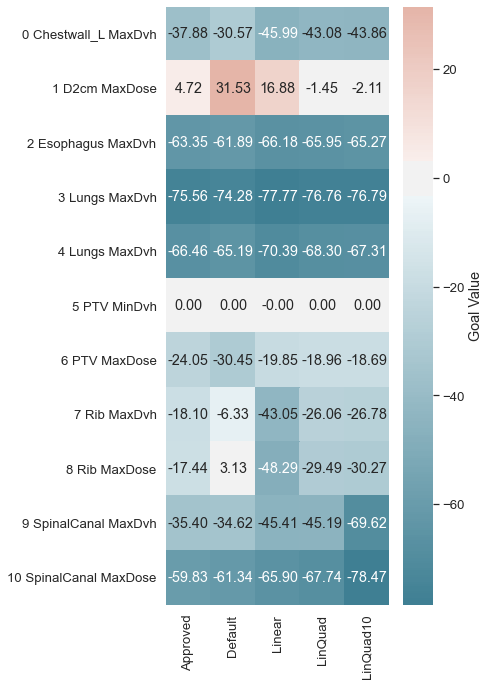

In [297]:
analyze.goalplot(
    approved.goal_df,
    {'Approved': approved, 'Default': default, 'Linear': linear, 'LinQuad': linquad, 'LinQuad10': linquad10})

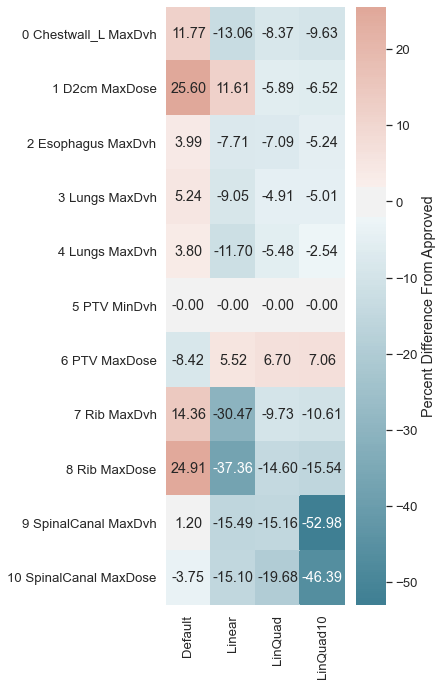

In [298]:
goalplot(approved, {'Default': default, 'Linear': linear, 'LinQuad': linquad, 'LinQuad10': linquad10})

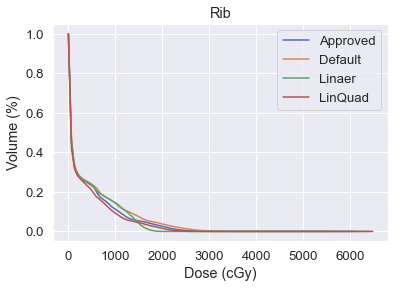

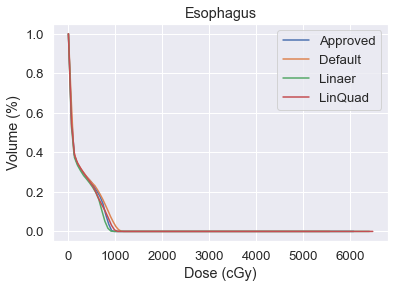

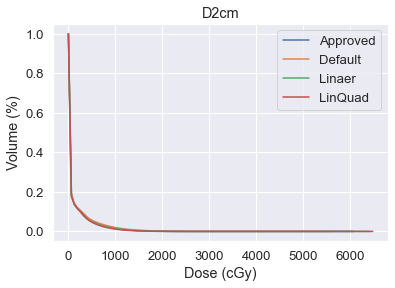

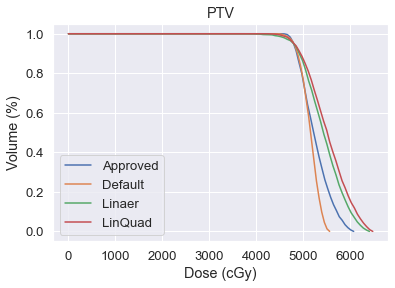

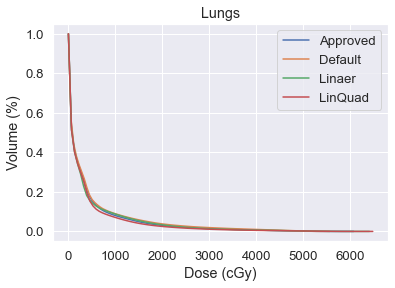

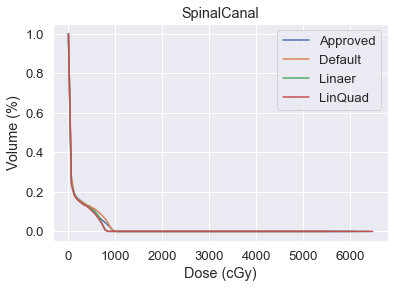

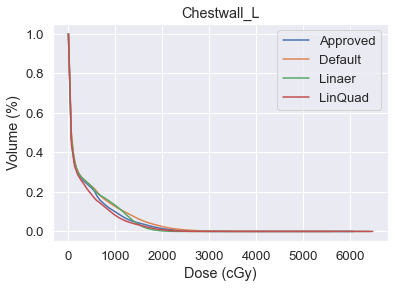

In [295]:
for roi in approved.roi_list:
    plt.figure()
    plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi])
    plt.plot(default.dvh_dict['Dose'], default.dvh_dict[roi])
    plt.plot(linear.dvh_dict['Dose'], linear.dvh_dict[roi])
    plt.plot(linquad.dvh_dict['Dose'], linquad.dvh_dict[roi])
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Volume (%)')
    plt.title(roi)
    plt.legend(['Approved', 'Default', 'Linaer', 'LinQuad'])

# Patient 2

In [128]:
approved = np.load('ZZ_MK_LLungSBRT3778/approved/res.pkl', allow_pickle=True)
default = np.load('ZZ_MK_LLungSBRT3778/default/res.pkl', allow_pickle=True)
linear = np.load('ZZ_MK_LLungSBRT3778/bayes/res_linear_gp_minimize.pkl', allow_pickle=True)
linquad = np.load('ZZ_MK_LLungSBRT3778/bayes/res_linear_quadratic_gp_minimize.pkl', allow_pickle=True)
linrib = np.load('ZZ_MK_LLungSBRT3778/bayes/res_lin_rib_gp_minimize.pkl', allow_pickle=True)

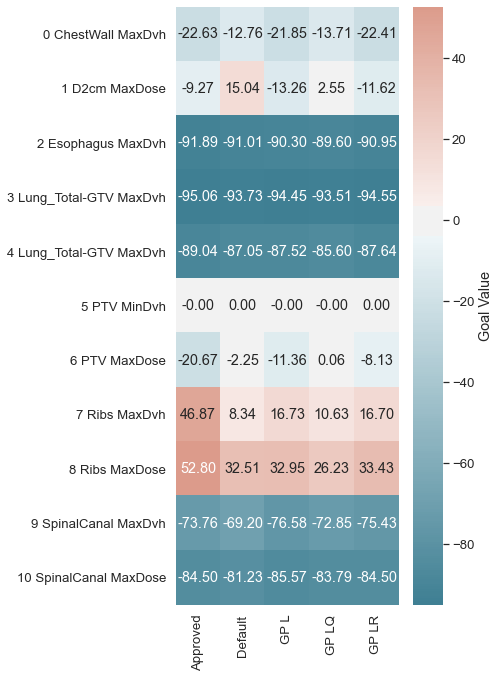

In [129]:
analyze.goalplot(
    approved.goal_df,
    {'Approved': approved, 'Default': default, 'GP L': linear, 'GP LQ': linquad, 'GP LR': linrib})

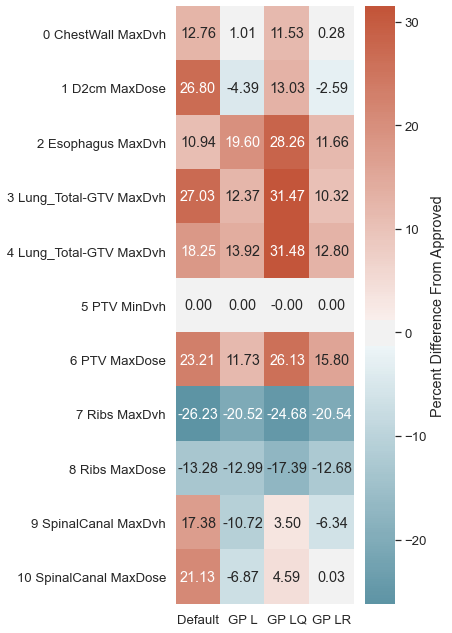

In [130]:
goalplot(approved, {'Default': default, 'GP L': linear, 'GP LQ': linquad, 'GP LR': linrib})

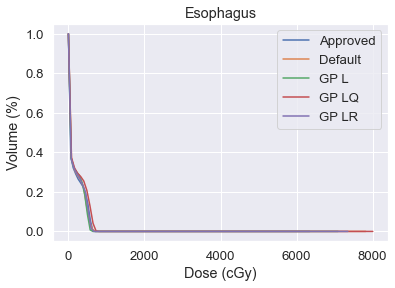

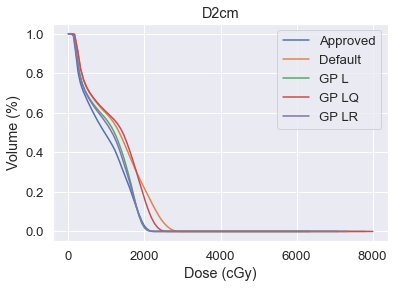

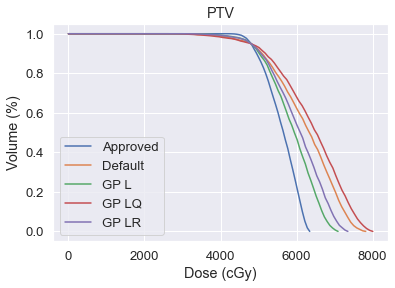

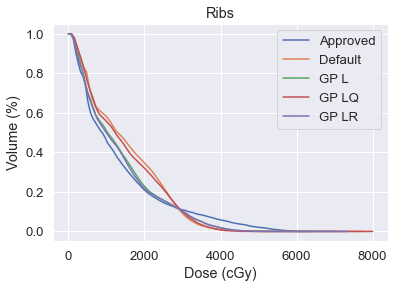

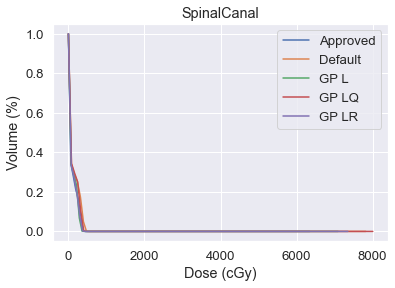

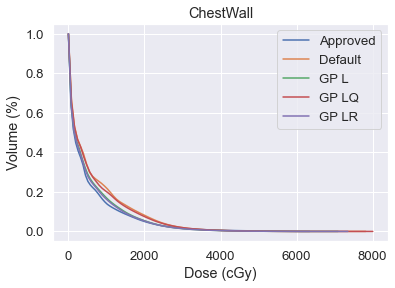

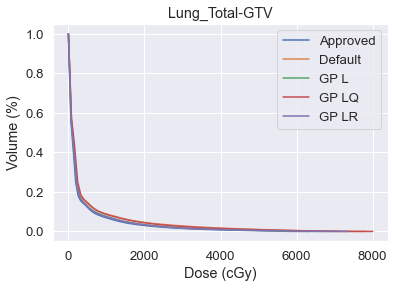

In [73]:
for roi in approved.roi_list:
    plt.figure()
    plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi])
    plt.plot(default.dvh_dict['Dose'], default.dvh_dict[roi])
    plt.plot(linear.dvh_dict['Dose'], linear.dvh_dict[roi])
    plt.plot(linquad.dvh_dict['Dose'], linquad.dvh_dict[roi])
    plt.plot(linrib.dvh_dict['Dose'], linrib.dvh_dict[roi])
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Volume (%)')
    plt.title(roi)
    plt.legend(['Approved', 'Default', 'GP L', 'GP LQ', 'GP LR'])

# Patient 3

In [131]:
approved = np.load('ZZ_MK_RLungSBRT4076/approved/res.pkl', allow_pickle=True)
default = np.load('ZZ_MK_RLungSBRT4076/default/res.pkl', allow_pickle=True)
linear = np.load('ZZ_MK_RLungSBRT4076/bayes/res_linear_gp_minimize.pkl', allow_pickle=True)
linquad = np.load('ZZ_MK_RLungSBRT4076/bayes/res_linear_quadratic_gp_minimize.pkl', allow_pickle=True)
linrib = np.load('ZZ_MK_RLungSBRT4076/bayes/res_lin_rib_gp_minimize.pkl', allow_pickle=True)

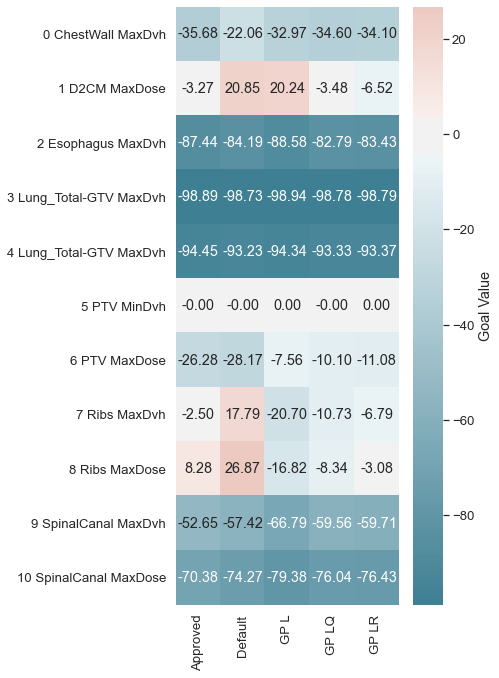

In [132]:
analyze.goalplot(
    approved.goal_df,
    {'Approved': approved, 'Default': default, 'GP L': linear, 'GP LQ': linquad, 'GP LR': linrib})

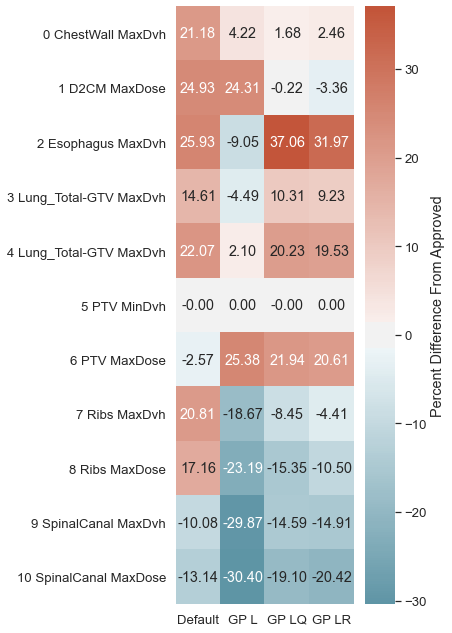

In [133]:
goalplot(approved, {'Default': default, 'GP L': linear, 'GP LQ': linquad, 'GP LR': linrib})

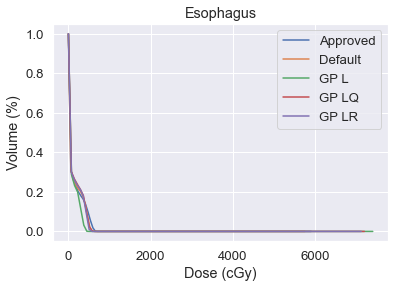

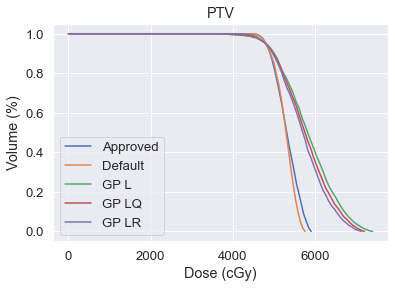

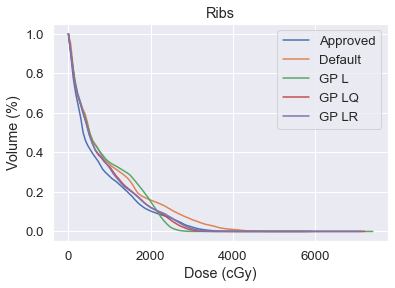

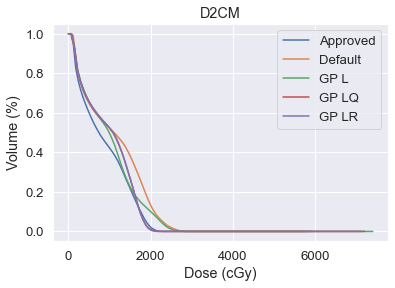

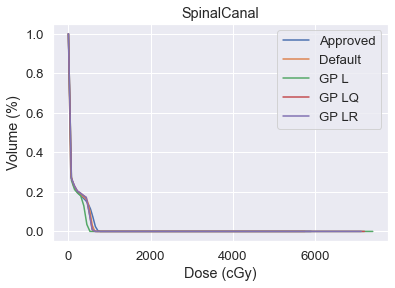

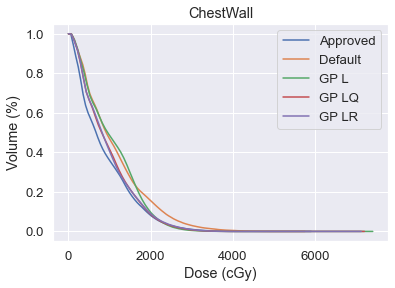

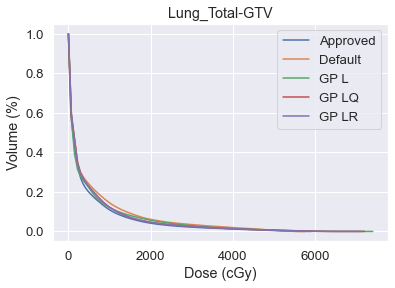

In [77]:
for roi in approved.roi_list:
    plt.figure()
    plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi])
    plt.plot(default.dvh_dict['Dose'], default.dvh_dict[roi])
    plt.plot(linear.dvh_dict['Dose'], linear.dvh_dict[roi])
    plt.plot(linquad.dvh_dict['Dose'], linquad.dvh_dict[roi])
    plt.plot(linrib.dvh_dict['Dose'], linrib.dvh_dict[roi])
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Volume (%)')
    plt.title(roi)
    plt.legend(['Approved', 'Default', 'GP L', 'GP LQ', 'GP LR'])

# Patient 4

In [229]:
approved = np.load('ZZ_MK_RULungSBRT3796/approved/res.pkl', allow_pickle=True)
default = np.load('ZZ_MK_RULungSBRT3796/default/res_default.pkl', allow_pickle=True)
linear = np.load('ZZ_MK_RULungSBRT3796/bayes/res_linear_gp_minimize.pkl', allow_pickle=True)
linquad = np.load('ZZ_MK_RULungSBRT3796/bayes/res_linear_quadratic_gp_minimize.pkl', allow_pickle=True)
linrib = np.load('ZZ_MK_RULungSBRT3796/bayes/res_lin_rib_gp_minimize.pkl', allow_pickle=True)
lincr = np.load('ZZ_MK_RULungSBRT3796/bayes/res_lin_cr_gp_minimize.pkl', allow_pickle=True) # with spinalcanal par
pars = np.load('ZZ_MK_RULungSBRT3796/bayes/res_ll_gp_minimize.pkl', allow_pickle=True) # with all pars

In [230]:
default.func_df = raybay.get_funcs('ZZ_MK_RULungSBRT3796/default/funcs.csv')
default.goal_df = pd.read_csv('ZZ_MK_RULungSBRT3796/goals.csv')

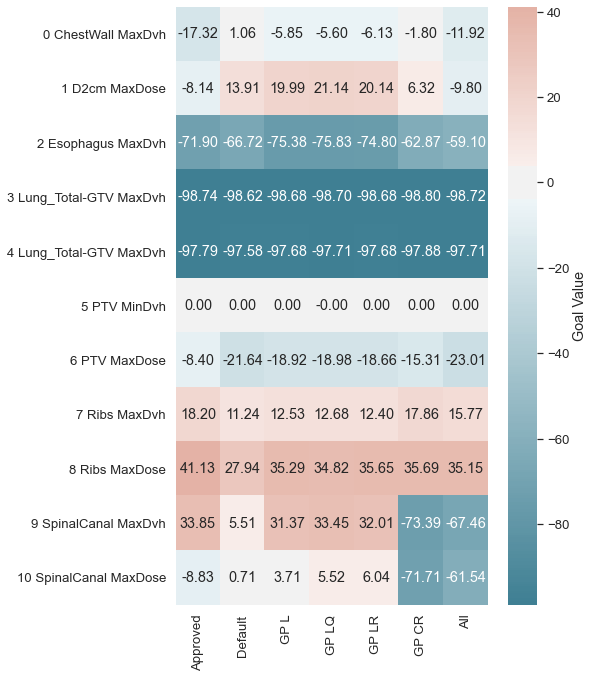

In [231]:
analyze.goalplot(
    approved.goal_df,
    {'Approved': approved, 'Default': default, 'GP L': linear, 'GP LQ': linquad, 'GP LR': linrib, 'GP CR': lincr,
     'All': pars})

# do I have the wrong percentages for this patient???

# Doesn't look good, what else could we try?
# * Include SpinalCanal MaxDvh parameter?
# * Use linear function for PTV MaxDose?

# last one incorrect: forgot to change the normalization values :(

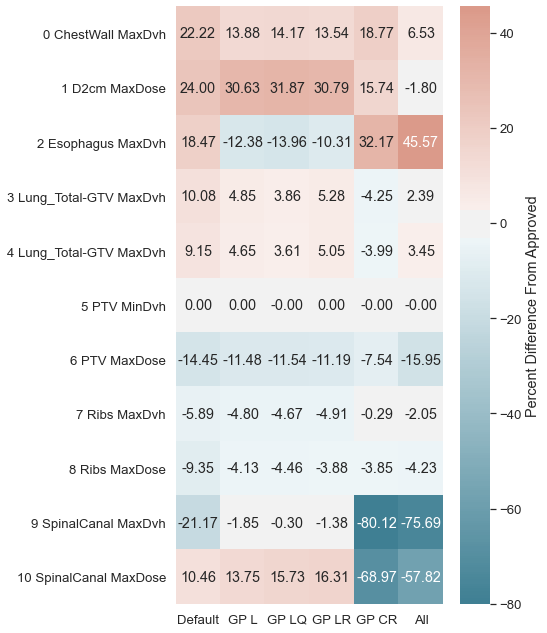

In [232]:
goalplot(approved, {'Default': default, 'GP L': linear, 'GP LQ': linquad, 'GP LR': linrib, 'GP CR': lincr, 'All': pars})

In [243]:
scale1 = 4800/lincr.dvh_dict['Dose'][70]
scale2 = 4800/pars.dvh_dict['Dose'][-3]

In [268]:
pars.goal_df = pd.read_csv('ZZ_MK_RULungSBRT3796/goals.csv')
pars.func_df = raybay.get_funcs('ZZ_MK_RULungSBRT3796/bayes/funcA.csv')

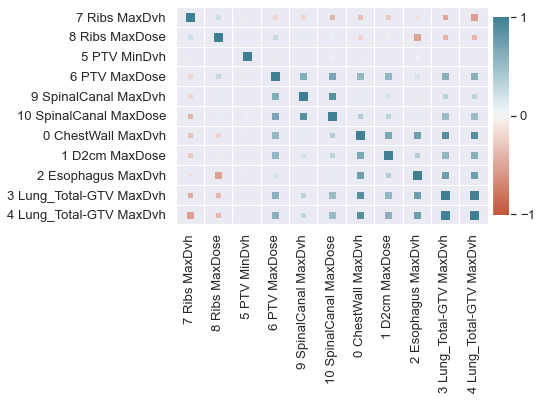

In [266]:
pars.corrplot()

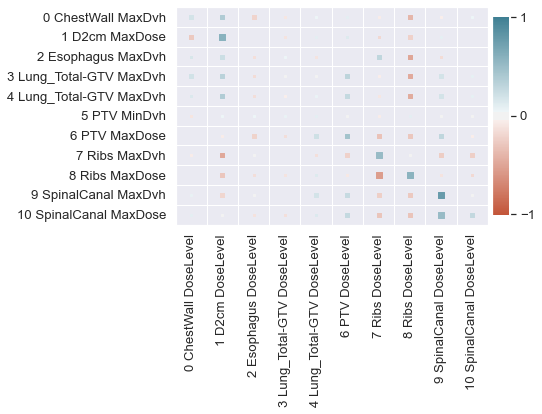

In [269]:
pars.corrplot('pars')

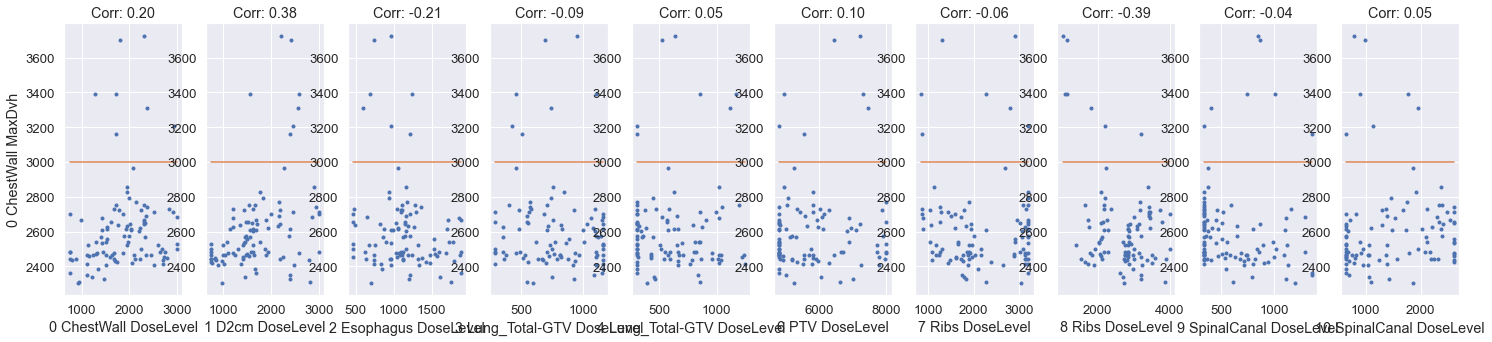

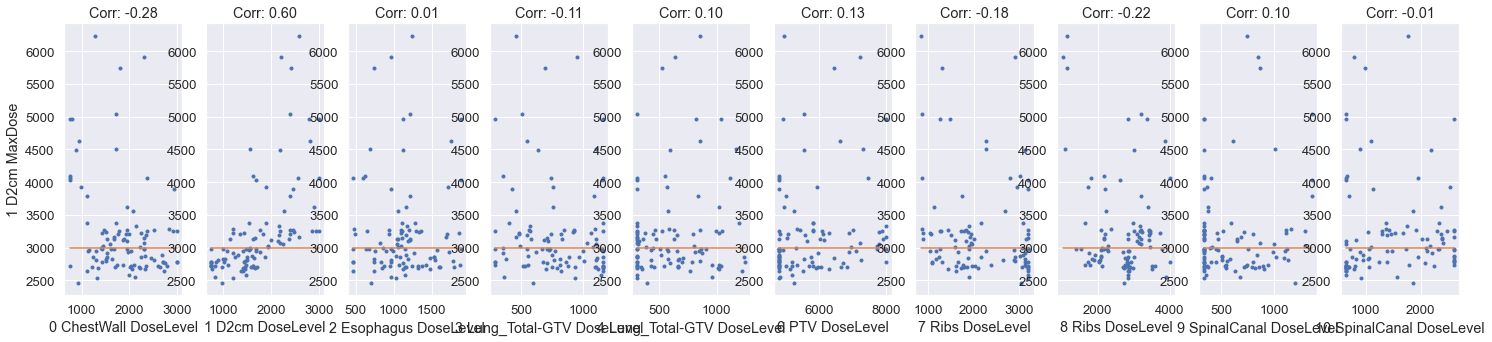

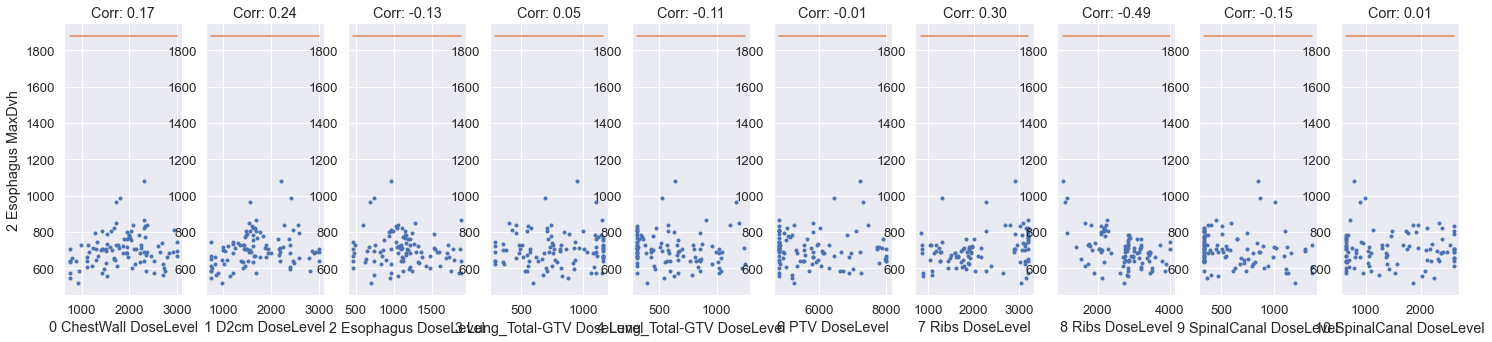

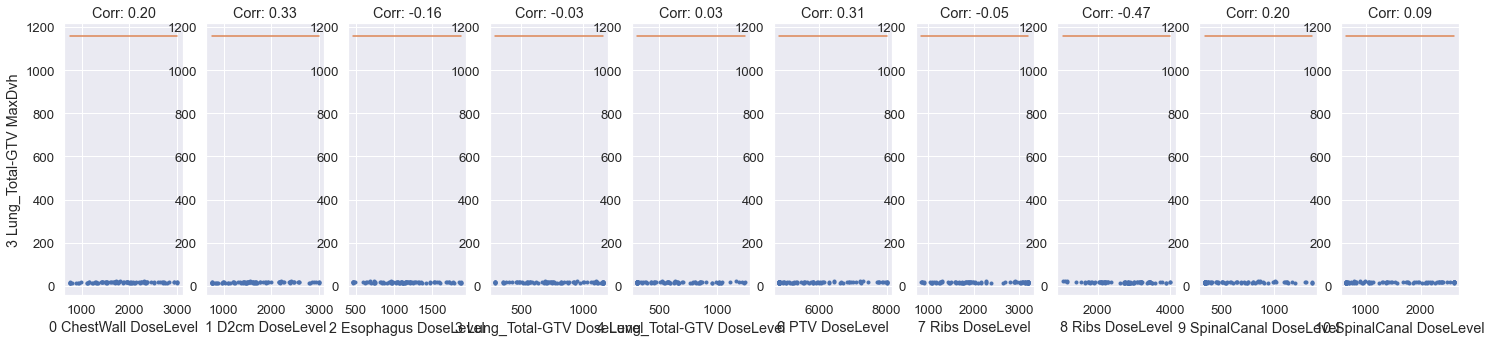

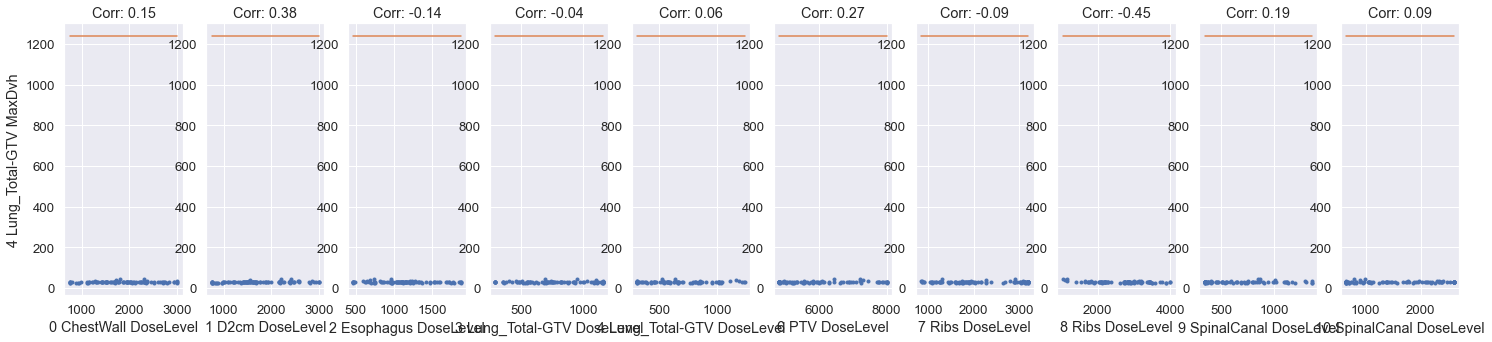

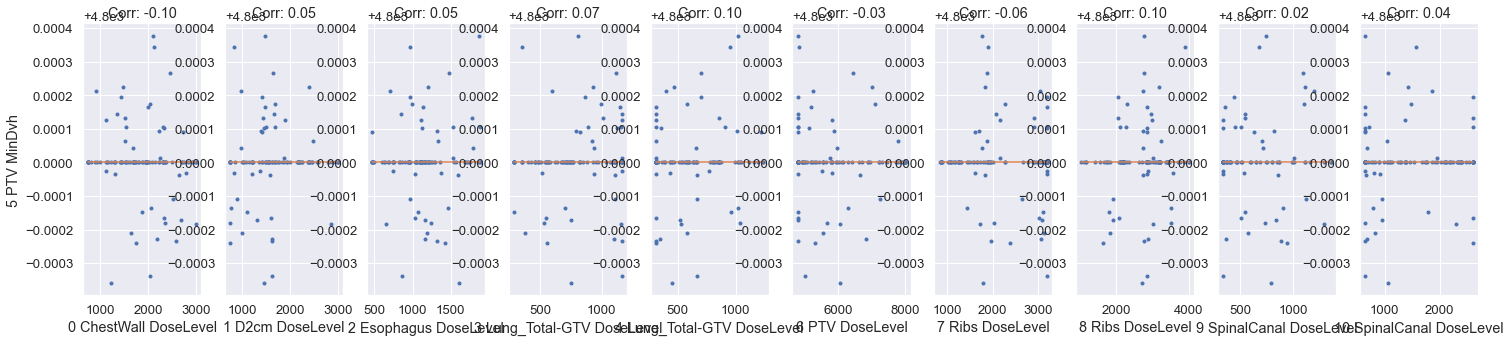

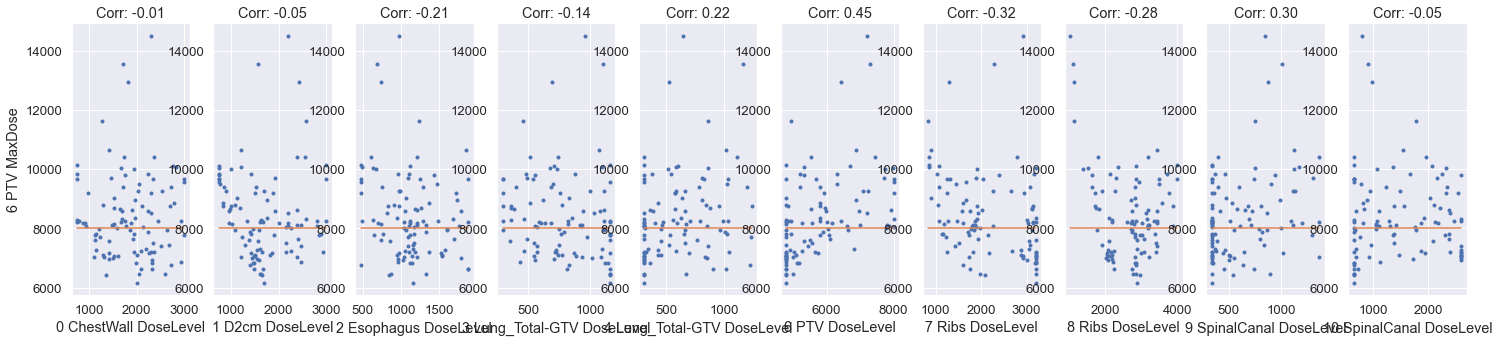

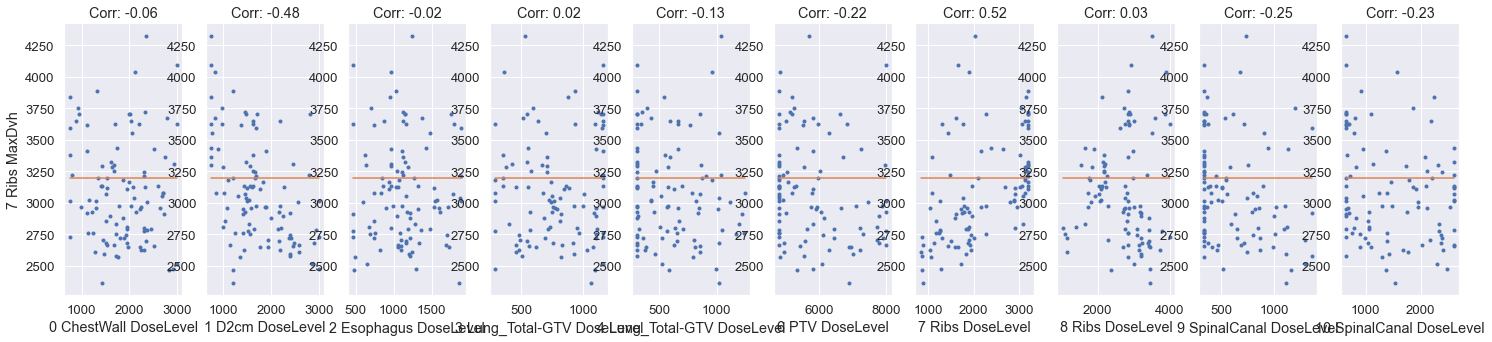

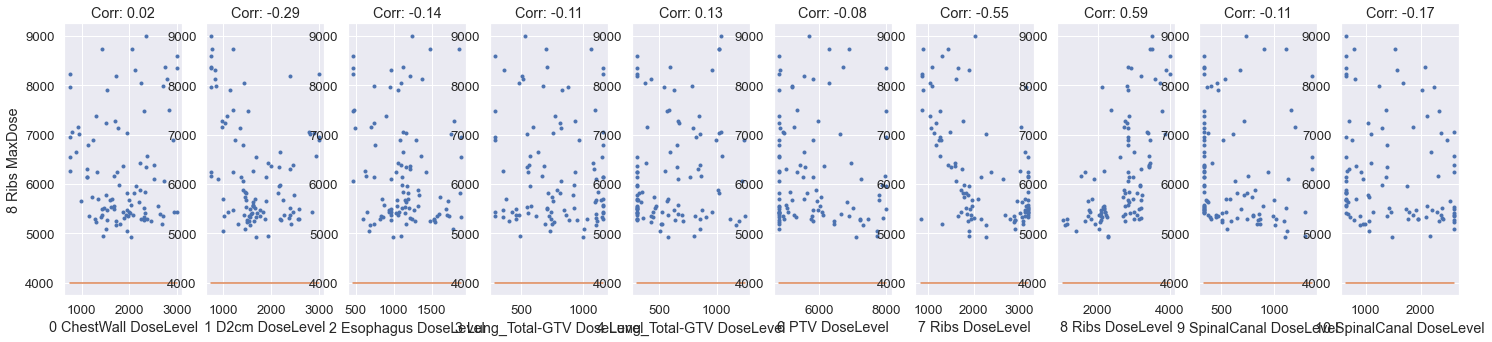

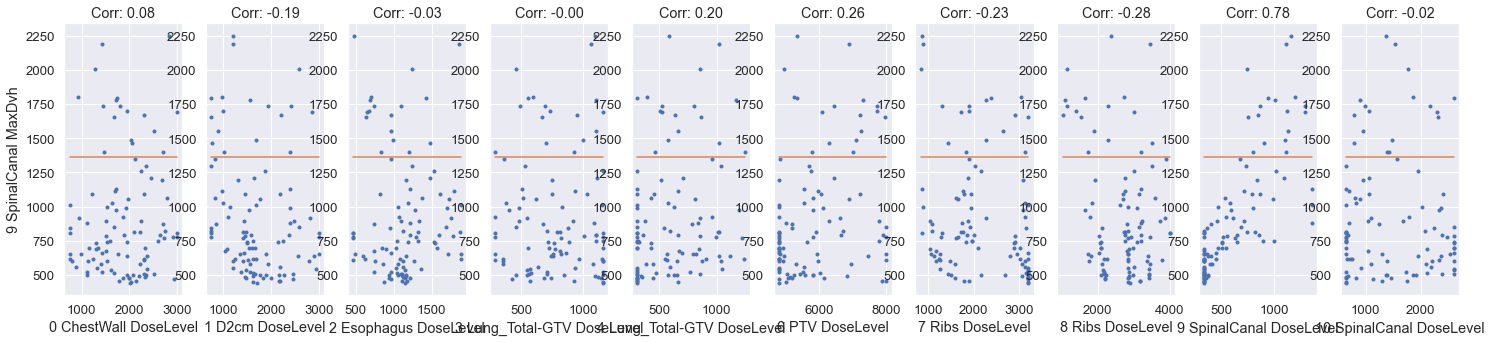

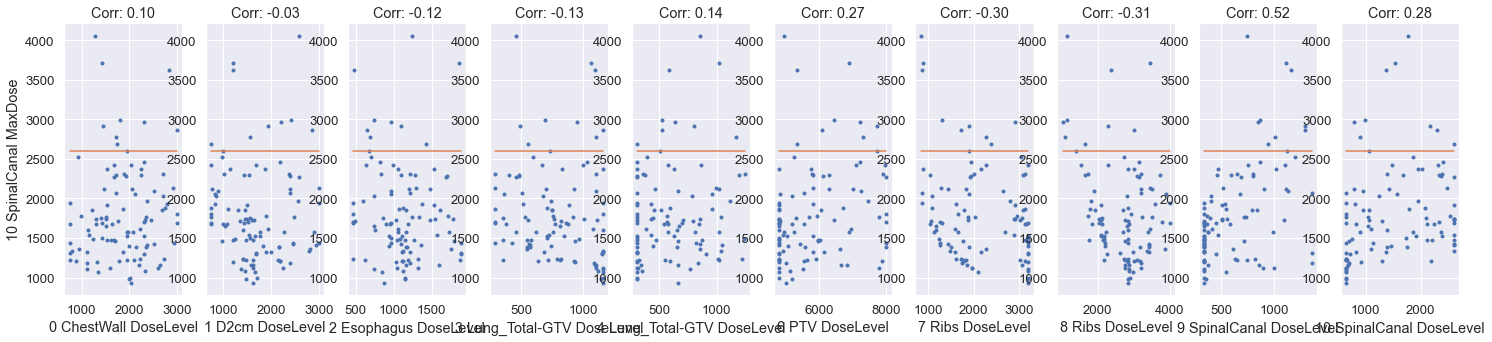

In [270]:
pars.scatterplot('pars')

(-400.0, 400.0)

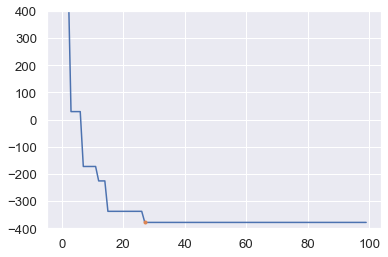

In [250]:
plt.plot(np.minimum.accumulate(pars.opt_result.func_vals))
plt.plot(np.argmin(pars.opt_result.func_vals), np.min(pars.opt_result.func_vals), '.')
plt.ylim([-400,400])

In [263]:
offset = 0
for index, row in approved.goal_df.iterrows():
    if row['Roi'] == 'PTV' and row['Type'] == 'MinDvh':
        offset = 1
    else:
        print(f"{row['Roi']} {row['Type']} {row['AcceptanceLevel']} {pars.opt_result.x[index-offset]}")

ChestWall MaxDvh 3000 2010.7449713948245
D2cm MaxDose 3000 1696.8373229845502
Esophagus MaxDvh 1880 1151.0635762885236
Lung_Total-GTV MaxDvh 1160 1160.0
Lung_Total-GTV MaxDvh 1240 310.0
PTV MaxDose 8000 4801.0
Ribs MaxDvh 3200 3200.0
Ribs MaxDose 4000 2888.6357091305363
SpinalCanal MaxDvh 1360 340.0
SpinalCanal MaxDose 2600 650.0


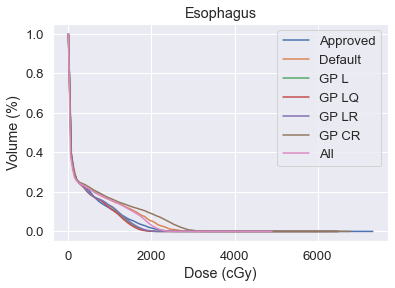

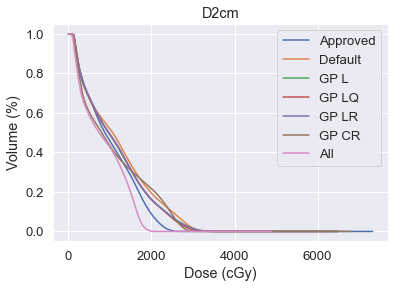

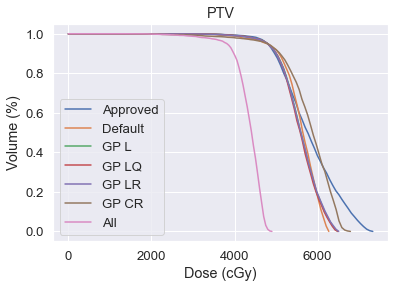

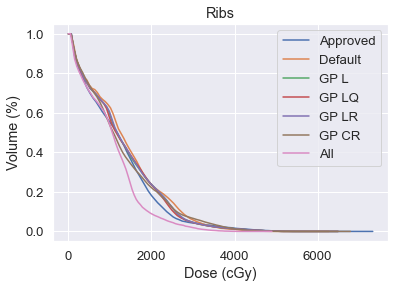

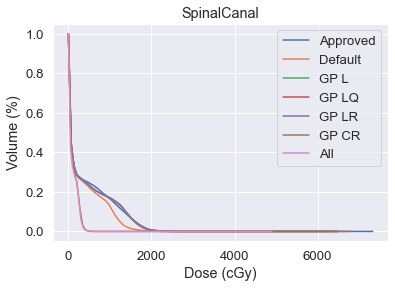

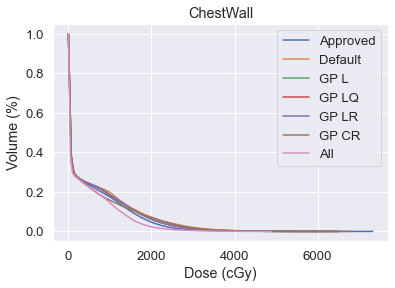

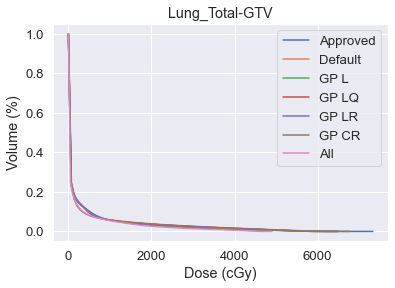

In [245]:
for roi in approved.roi_list:
    plt.figure()
    plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi])
    plt.plot(default.dvh_dict['Dose'], default.dvh_dict[roi])
    plt.plot(linear.dvh_dict['Dose'], linear.dvh_dict[roi])
    plt.plot(linquad.dvh_dict['Dose'], linquad.dvh_dict[roi])
    plt.plot(linrib.dvh_dict['Dose'], linrib.dvh_dict[roi])
    plt.plot(scale1*lincr.dvh_dict['Dose'], lincr.dvh_dict[roi]) # normalization failed for best? need to renormalize?
    plt.plot(scale2*pars.dvh_dict['Dose'], scale2*pars.dvh_dict[roi]) # normalize before saving...
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Volume (%)')
    plt.title(roi)
    plt.legend(['Approved', 'Default', 'GP L', 'GP LQ', 'GP LR', 'GP CR', 'All'])

# Patient 5

In [159]:
# Load treatment plan results
approved = np.load('ZZ_MK_LLLungSBRT3977/approved/res_approved.pkl', allow_pickle=True)
default = np.load('ZZ_MK_LLLungSBRT3977/default/res_default.pkl', allow_pickle=True)
linear = np.load('ZZ_MK_LLLungSBRT3977/bayes/res_linear_gp_minimize.pkl', allow_pickle=True)
linquad = np.load('ZZ_MK_LLLungSBRT3977/bayes/res_linear_quadratic_gp_minimize.pkl', allow_pickle=True)
linrib = np.load('ZZ_MK_LLLungSBRT3977/bayes/res_lin_rib_gp_minimize.pkl', allow_pickle=True)
lincr = np.load('ZZ_MK_LLLungSBRT3977/bayes/res_lin_cr_gp_minimize.pkl', allow_pickle=True)

In [160]:
approved.goal_df = pd.read_csv('ZZ_MK_LLLungSBRT3977/goals.csv')
approved.func_df = raybay.get_funcs('ZZ_MK_LLLungSBRT3977/approved/funcs.csv')
default.goal_df = pd.read_csv('ZZ_MK_LLLungSBRT3977/goals.csv')
default.func_df = raybay.get_funcs('ZZ_MK_LLLungSBRT3977/default/funcs.csv')
linear.goal_df = pd.read_csv('ZZ_MK_LLLungSBRT3977/goals.csv')
linquad.goal_df = pd.read_csv('ZZ_MK_LLLungSBRT3977/goals.csv')
linrib.goal_df = pd.read_csv('ZZ_MK_LLLungSBRT3977/goals.csv')
lincr.goal_df = pd.read_csv('ZZ_MK_LLLungSBRT3977/goals.csv')

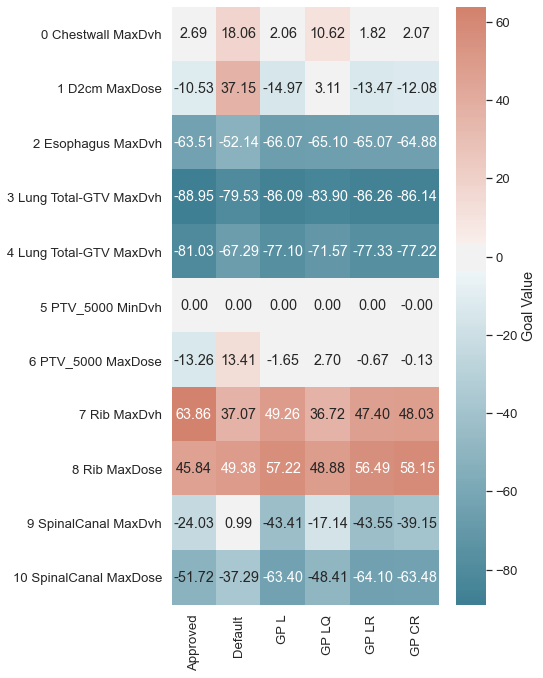

In [161]:
analyze.goalplot(
    approved.goal_df,
    {'Approved': approved, 'Default': default, 'GP L': linear, 'GP LQ': linquad, 'GP LR': linrib, 'GP CR': lincr})

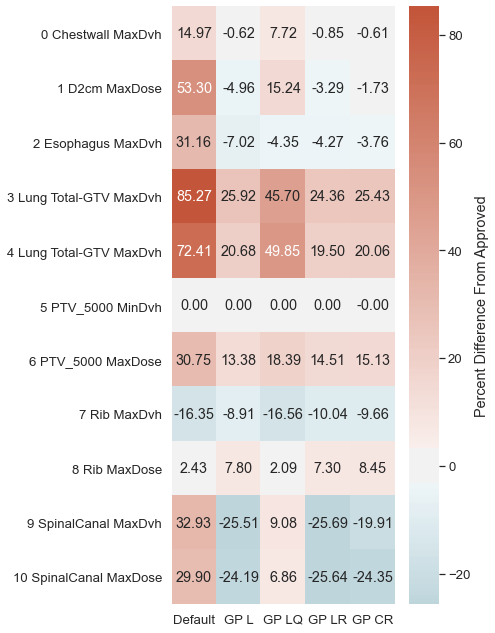

In [162]:
goalplot(approved, {'Default': default, 'GP L': linear, 'GP LQ': linquad, 'GP LR': linrib, 'GP CR': lincr})

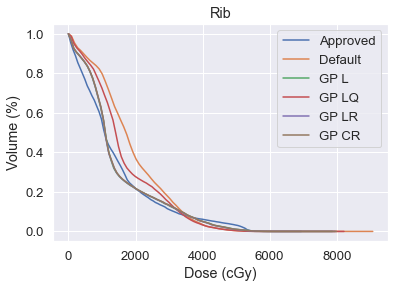

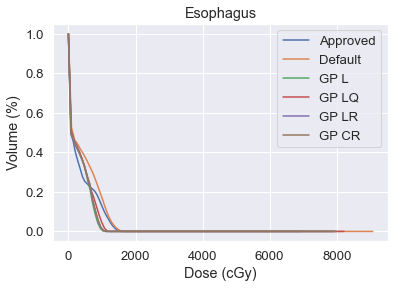

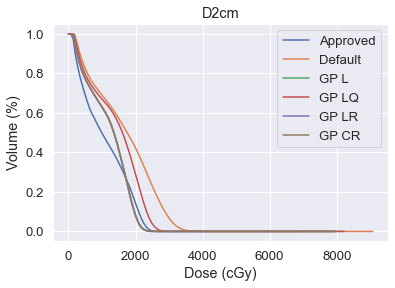

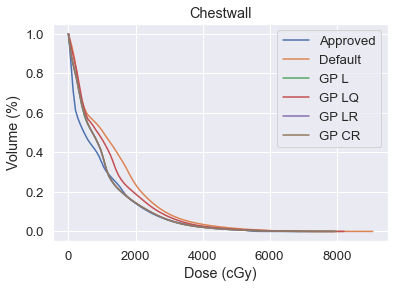

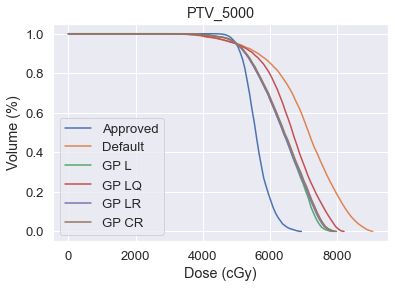

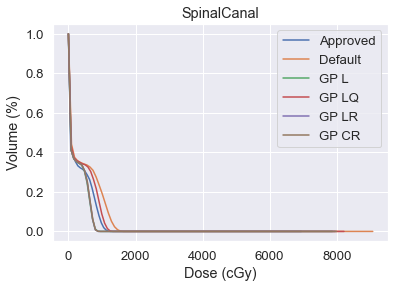

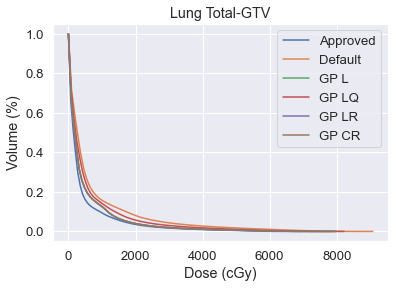

In [163]:
for roi in approved.roi_list:
    plt.figure()
    plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi])
    plt.plot(default.dvh_dict['Dose'], default.dvh_dict[roi])
    plt.plot(linear.dvh_dict['Dose'], linear.dvh_dict[roi])
    plt.plot(linquad.dvh_dict['Dose'], linquad.dvh_dict[roi])
    plt.plot(linrib.dvh_dict['Dose'], linrib.dvh_dict[roi])
    plt.plot(lincr.dvh_dict['Dose'], linrib.dvh_dict[roi])
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Volume (%)')
    plt.title(roi)
    plt.legend(['Approved', 'Default', 'GP L', 'GP LQ', 'GP LR', 'GP CR'])

In [148]:
# one thing at a time... 
# after finish patient 5, go back and run with linear for chestwall for all of them...

# what about trying to run all of the plans with the best objective and all parameters?

In [226]:
# try all parameters with for 1/4-1 range with linear rib and chestwall??? 


20.0